# Introduction

I didn't implement all parts of the endpoints like registration, password reset, view profile, request and accept friends and etc. It's because my aim was to get the ECG and PPG data only. But I already provided the steps to extract this API in the readme, any contribution to add the additional endpoints are welcomed

# Testing

I didn't have time to include test suites so I wouldn't advice to use the sdk in production environment yet. I might add the test next time. Maybe.

In [1]:
import json
from WearHeartApi.SDK import WearHeart
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
print(plt.style.available)
plt.style.use('ggplot')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [3]:
wearHeart = WearHeart()

In [4]:
# rename credentials.json.example to credentials.json 
# and filled up your credential info
with open("credentials.json") as f:
    cred = f.read()
    cred = json.loads(cred)

In [5]:
# the cred should contains email, password and uid fields
cred.keys()

dict_keys(['email', 'password', 'uid'])

## Authentication

We do have 2 options here either first to login or if you already know the uid can opt for the second option. Essentially the login is to retrieve the uid. I believe the security procedures here are poorly built. I honeslty don't trust them to store my health data into the their server. God knows how they manage it.

You must treat the uid here as secret token. If someone else knew this id they can download your entire wearheart data.

In [6]:
# login option
wearHeart.login(cred['email'],cred['password'] )

In [7]:
# once logged in can verify the uid is not None
assert wearHeart.uid is not None

In [8]:
# set uid option
wearHeart.set_uid(cred['uid'])

In [9]:
wearHeart.get_day_heart_data()

{'result': '1',
 'data': {'day_data': {'c_allday_avg_heart': '67',
   'c_date': '2019-07-14',
   'c_id': '-',
   'c_sleep_avg_heart': '0',
   'c_totalscore': '0,0,0,0,0,0,0,0,59,0,0,0,0,0,0,0,76,0,0,0,0,0,0,0',
   'c_uid': '',
   'havedata': 'yes'}}}

In [10]:
## c_uid is censored in api result
# you may disable the censor through

# wearHeart.set_is_censored(False)

In [11]:
# the function accept 3 args date, page, and pagesize
wearHeart.get_health_data_by_page()

{'result': '1',
 'data': {'health_data': [{'c_body_load': '55',
    'c_body_quality': '72',
    'c_cardiac_function': '76',
    'c_date': '2019-07-14 16:21:27',
    'c_diastolic': '83',
    'c_ecg_report': '0',
    'c_fatigue_index': '49',
    'c_health_index': '78',
    'c_heart': '78',
    'c_systolic': '129',
    'c_uid': '-'},
   {'c_body_load': '45',
    'c_body_quality': '76',
    'c_cardiac_function': '80',
    'c_date': '2019-07-14 08:30:56',
    'c_diastolic': '76',
    'c_ecg_report': '0',
    'c_fatigue_index': '40',
    'c_health_index': '82',
    'c_heart': '61',
    'c_systolic': '119',
    'c_uid': '-'},
   {'c_body_load': '42',
    'c_body_quality': '78',
    'c_cardiac_function': '81',
    'c_date': '2019-07-14 08:28:56',
    'c_diastolic': '75',
    'c_ecg_report': '0',
    'c_fatigue_index': '38',
    'c_health_index': '84',
    'c_heart': '57',
    'c_systolic': '117',
    'c_uid': '-'}]}}

In [12]:
# use the health_data date data from get_health_data_by_page to retrieve raw ECG
ecgs = wearHeart.get_ecg_data("2019-07-14 08:30:56")

In [13]:
ecgs['data']['health_data'].keys()

dict_keys(['c_body_load', 'c_body_quality', 'c_cardiac_function', 'c_date', 'c_diastolic', 'c_ecg_raw_data', 'c_ecg_report', 'c_fatigue_index', 'c_health_index', 'c_heart', 'c_ppg_raw_data', 'c_systolic', 'c_uid'])

In [14]:
ecg_df = pd.DataFrame(ecgs['data']['health_data']['c_ecg_raw_data'].split(","), columns=['ecg_raw'])
ecg_df['ecg_raw'] = ecg_df['ecg_raw'].astype('int64')

In [15]:
ppg_df = pd.DataFrame([int(i) for i in ecgs['data']['health_data']['c_ppg_raw_data'].split(",")], columns=['ppg_raw'])
ppg_df['ppg_raw'] = ppg_df['ppg_raw'].astype('int64')


In [16]:
ppg_df.describe()

,ppg_raw
count,747.000000
mean,5034.191432
std,2246.109695
min,4335.000000
25%,4412.000000
50%,4539.000000
75%,4687.000000
max,15026.000000


In [17]:
ecg_df.describe()

,ecg_raw
count,3744.000000
mean,14310.999466
std,602.835371
min,13368.000000
25%,13767.750000
50%,14262.000000
75%,14883.500000
max,15257.000000


## Plotting

I haven't figured out yet how to normalize this ECG data.

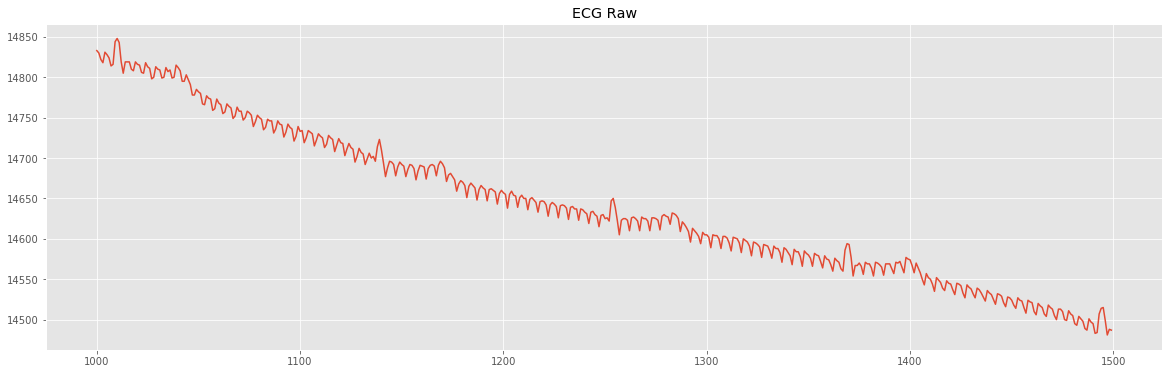

In [18]:
plt.figure(figsize=(20,6))
plt.plot(ecg_df['ecg_raw'][1000:1500])
plt.title("ECG Raw")
plt.show()

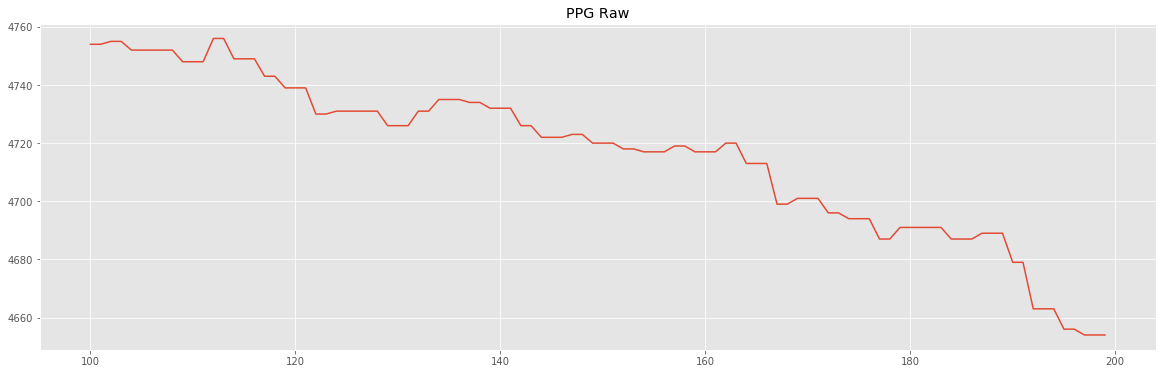

In [19]:
plt.figure(figsize=(20,6))
plt.plot(ppg_df['ppg_raw'][100:200])
plt.title("PPG Raw")
plt.show()